In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
from nltk.corpus import stopwords

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
import nltk

In [10]:
from nltk.corpus import stopwords

In [11]:
from nltk.stem.porter import PorterStemmer

In [12]:
from wordcloud import WordCloud,STOPWORDS

In [13]:
from nltk.stem import WordNetLemmatizer

In [14]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [15]:
from bs4 import BeautifulSoup

In [16]:
import string, re, unicodedata

In [17]:
from string import punctuation

In [18]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

In [21]:
import gensim

In [22]:
import plotly.express as px

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
from tensorflow.keras.models import Sequential, load_model

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
from tensorflow.keras.optimizers import Adam

In [30]:
from tensorflow.keras.preprocessing import text, sequence

In [31]:
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU

In [32]:
df = pd.read_csv("Dataset/all-the-news-2-1.csv", nrows=490000)

In [33]:
df.shape

(490000, 10)

In [34]:
df.head()

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490000 entries, 0 to 489999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         490000 non-null  object 
 1   year         490000 non-null  int64  
 2   month        490000 non-null  float64
 3   day          490000 non-null  int64  
 4   author       371399 non-null  object 
 5   title        490000 non-null  object 
 6   article      487434 non-null  object 
 7   url          490000 non-null  object 
 8   section      210394 non-null  object 
 9   publication  490000 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 37.4+ MB


In [36]:
df.isna().sum()

date                0
year                0
month               0
day                 0
author         118601
title               0
article          2566
url                 0
section        279606
publication         0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.isna().sum()

date           0
year           0
month          0
day            0
author         0
title          0
article        0
url            0
section        0
publication    0
dtype: int64

In [39]:
df.duplicated().sum()

1

In [40]:
df["publication"].value_counts()

Vice       93738
Reuters    41704
Name: publication, dtype: int64

<AxesSubplot:xlabel='publication', ylabel='count'>

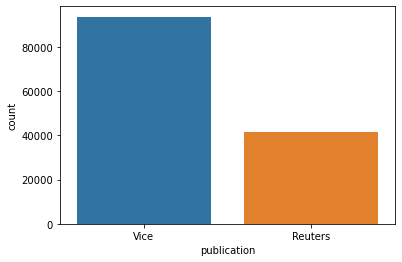

In [41]:
sns.countplot(data=df, x="publication")

In [42]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [43]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [44]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [45]:
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

In [46]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [47]:
def cleanse_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [48]:
df['article']=df['article'].apply(cleanse_text)

C:\Users\mcpe0\anaconda3\envs\python3.9.12\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


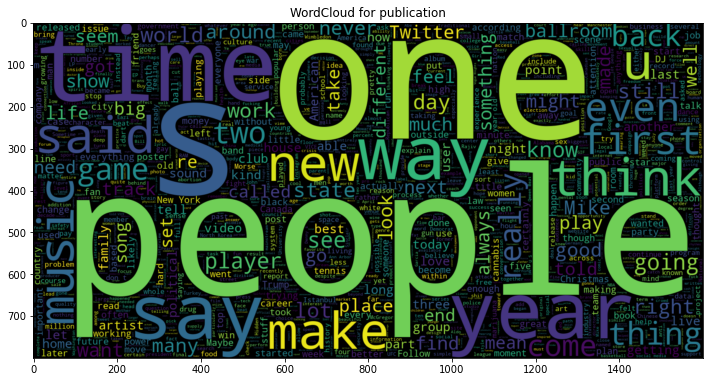

In [49]:
plt.figure(figsize = (12,10)) 
plt.title("WordCloud for publication")
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.publication == 'Vice'].head(100).article))
plt.imshow(wc , interpolation = 'bilinear')

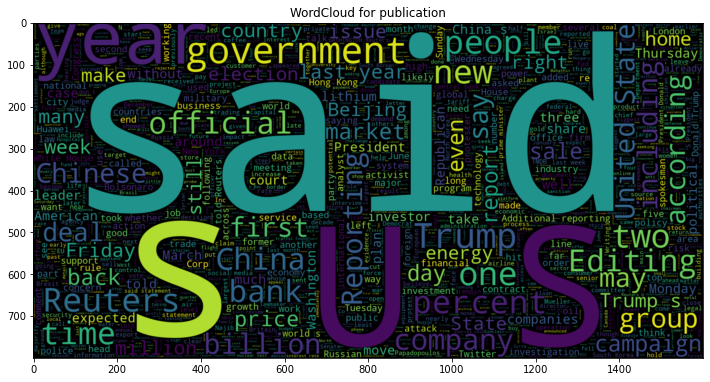

In [50]:
plt.figure(figsize = (12,10)) 
plt.title("WordCloud for publication")
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.publication == 'Reuters'].head(100).article))
plt.imshow(wc , interpolation = 'bilinear')

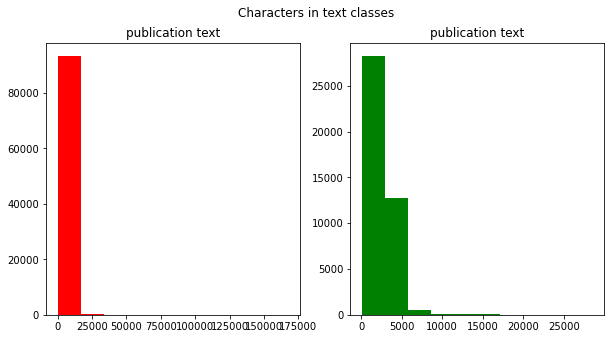

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['publication']=='Vice']['article'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('publication text')
text_len=df[df['publication']=='Reuters']['article'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('publication text')
fig.suptitle('Characters in text classes')
plt.show()

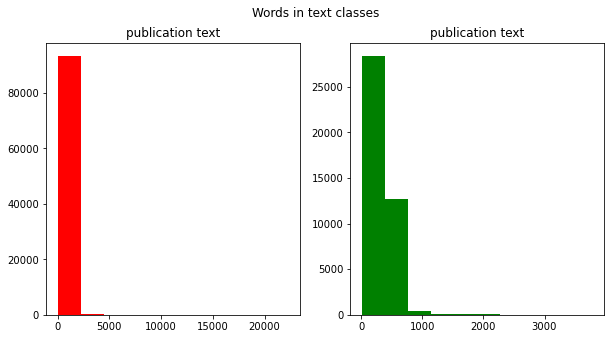

In [52]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['publication']=='Vice']['article'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('publication text')
text_len=df[df['publication']=='Reuters']['article'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('publication text')
fig.suptitle('Words in text classes')
plt.show()

C:\Users\mcpe0\anaconda3\envs\python3.9.12\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mcpe0\anaconda3\envs\python3.9.12\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\mcpe0\anaconda3\envs\python3.9.12\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcpe0\anaconda3\envs\python3.9.12\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

Text(0.5, 0.98, 'Average word length in each text class')

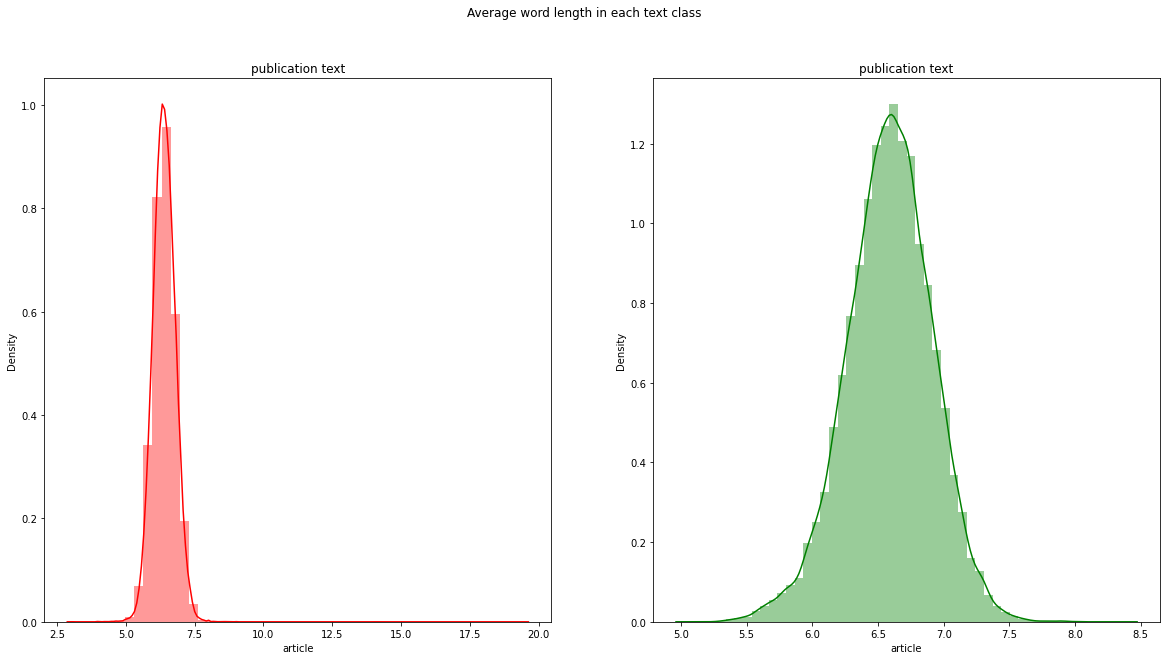

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['publication']=='Vice']['article'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('publication text')
word=df[df['publication']=='Reuters']['article'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('publication text')
fig.suptitle('Average word length in each text class')

In [54]:
EMBEDDING_DIM = 200

In [55]:
max_words = 5000 
max_len = 100 

In [56]:
le = LabelEncoder()
df['publication'] = le.fit_transform(df['publication'])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df['article'], df['publication'], test_size=0.2, random_state=42)

In [58]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [59]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [60]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [61]:
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128))
    model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
    model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [62]:
model = create_model()

In [63]:
model.compile(optimizer=Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

C:\Users\mcpe0\anaconda3\envs\python3.9.12\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               55680     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 958,913
Trainable params: 958,913
Non-trainable params: 0
_________________________________________________________________


In [71]:
can_train = False

In [73]:
import pickle
if can_train:
    history = model.fit(X_train_pad, y_train, batch_size = 128 , validation_split = 0.2, epochs = 5)
    model.save("All-The-News-DS-AB-CD.keras")
    with open("All-The-News-DS-AB-CD.pickle", "wb") as fs:
        pickle.dump(history.history, fs)
    history = history.history
else:
    model = load_model("All-The-News-DS-AB-CD.keras")
    with open("All-The-News-DS-AB-CD.pickle", "rb") as fs:
        history = pickle.load(fs)

In [77]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train_pad, y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test_pad, y_test)[1]*100)

3387/3387 [==============================] - 472s 139ms/step - loss: 0.0053 - acc: 0.9987
Accuracy of the model on Training Data is -  99.86525774002075
847/847 [==============================] - 117s 138ms/step - loss: 0.0126 - acc: 0.9972
Accuracy of the model on Testing Data is -  99.72313642501831


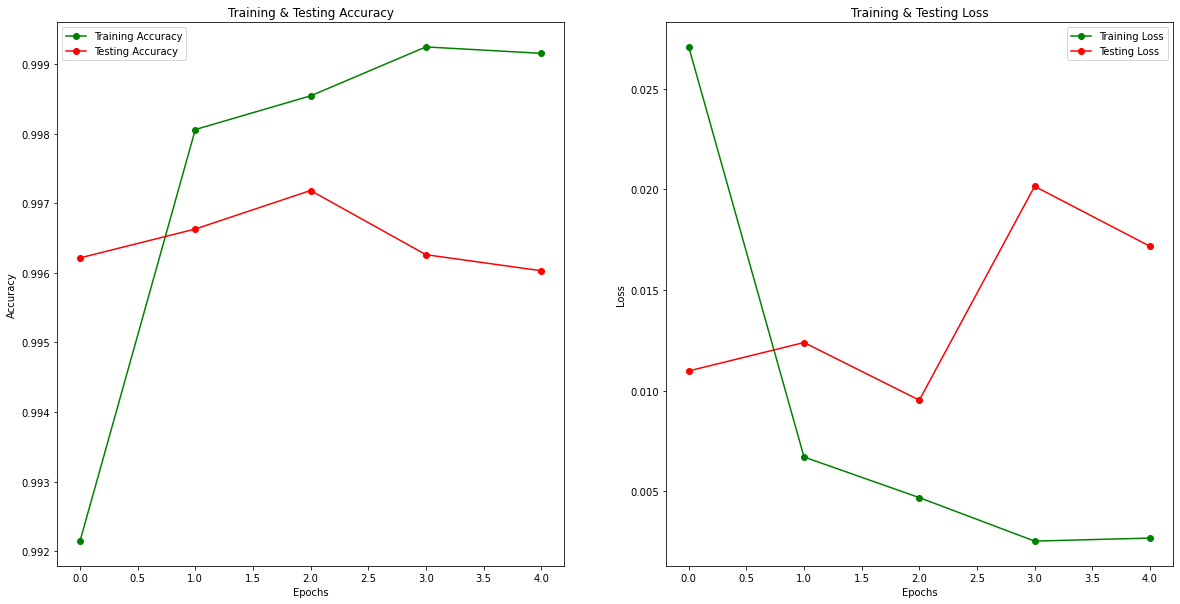

In [79]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history['acc']
train_loss = history['loss']
val_acc = history['val_acc']
val_loss = history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()